In [56]:
import os
import zipfile

# Training File
local_zip = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('horse-or-human')

# Validation File
local_zip = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('validation-horse-or-human')

zip_ref.close()

In [57]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('horse-or-human/humans')

# Directory with our validation horse pictures
validation_horse_dir = os.path.join('validation-horse-or-human/horses')

# Directory with our validation human pictures
validation_human_dir = os.path.join('validation-horse-or-human/humans')

In [58]:
# training set
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

# validation set
validation_horse_names = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)

**Find out total number of horse and human images in the directories**

In [59]:
print('Total training horse images:', len(os.listdir(train_horse_dir)))
print('Total training human images:', len(os.listdir(train_human_dir)))
print('Total validation horse images:', len(os.listdir(validation_horse_dir)))
print('Total validation human images:', len(os.listdir(validation_human_dir)))

Total training horse images: 500
Total training human images: 527
Total validation horse images: 128
Total validation human images: 128


**Taking a look at a few pictures**

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import matplotlib.image as mpimg

# Parameters for graph, we will output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

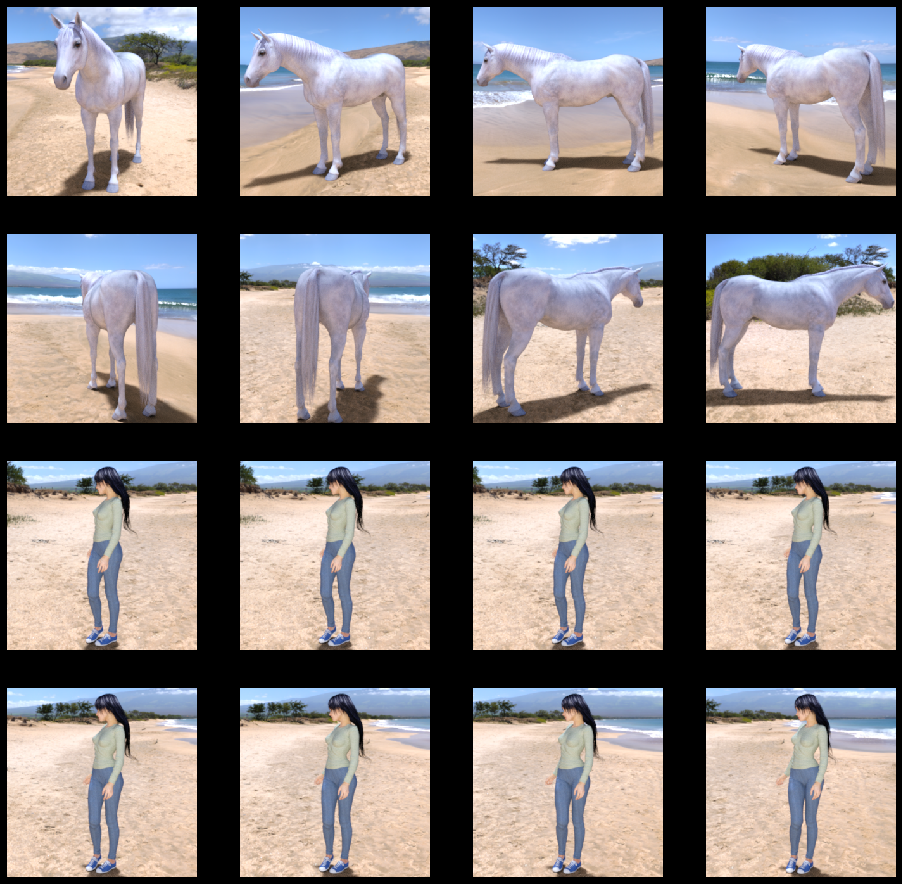

In [61]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index +=8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building a Small Model from Scratch

In [62]:
import tensorflow as tf

In [63]:
model = tf.keras.models.Sequential([
    # input shape is the desired size of image 300x300 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 33, 33, 64)       

In [65]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

### Data Preprocessing

In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('horse-or-human',
                                                    target_size=(300,300),
                                                    batch_size=128,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory('validation-horse-or-human',
                                                    target_size=(300,300),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Training

In [67]:
history = model.fit(train_generator,
                    steps_per_epoch=8,
                    epochs=15,
                    verbose=1,
                    validation_data = validation_generator,
                    validation_steps=8)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 8 steps
Epoch 1/15
8/8 [==============================] - 61s 8s/step - loss: 0.8095 - accuracy: 0.5662 - val_loss: 0.7942 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 68s 8s/step - loss: 0.6153 - accuracy: 0.6396 - val_loss: 1.0269 - val_accuracy: 0.5273
Epoch 3/15
8/8 [==============================] - 67s 8s/step - loss: 0.7932 - accuracy: 0.7021 - val_loss: 0.6778 - val_accuracy: 0.5312
Epoch 4/15
8/8 [==============================] - 60s 7s/step - loss: 0.4518 - accuracy: 0.8187 - val_loss: 0.3440 - val_accuracy: 0.8945
Epoch 5/15
8/8 [==============================] - 68s 8s/step - loss: 0.2918 - accuracy: 0.8828 - val_loss: 0.6033 - val_accuracy: 0.8750
Epoch 6/15
8/8 [==============================] - 61s 8s/step - loss: 0.1996 - accuracy: 0.9088 - val_loss: 1.3142 - val_accuracy: 0.7656
Epoch 7/15
8/8 [==============================] - 68s 9s/step - loss: 0.1434 - acc

## Running the Model

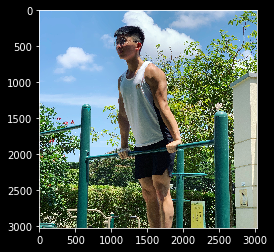

Picture is a horse


In [68]:
import numpy as np
from keras.preprocessing import image

# predicting images
path = r'testing2.jpg'

test_img = mpimg.imread(path)
plt.imshow(test_img)
plt.show()

img = image.load_img(path, target_size=(300,300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
#print(classes[0])
if classes[0] > 0.5:
    print('Picture is a human')
else:
    print('Picture is a horse')

## Visualizing Intermediate Representations

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')